In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import statsmodels.api as sm

# Linear Regression

In [22]:
df = pd.read_csv("RFLData.csv")
df.shape

/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_19289/2706743201.py:1: DtypeWarning: Columns (12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RFLData.csv")


(111041, 18)

In [23]:
for columns in df.columns:
    if "Unnamed" in columns:
        df.drop(columns, axis=1, inplace=True)
df.describe()

,RFL_Att,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP Code
count,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,1.110410e+05,111041.000000,111041.000000,111041.000000
mean,12.081390,12.916485,78.788240,29580.656942,-0.108868,10.146837,11.244324,7.850797e+10,3348.651709,0.530645,2.647518
std,4.089316,9.505956,17.514275,24892.579354,0.840872,6.162120,7.000356,5.000016e+09,1208.521498,3.244773,2.935448
min,-0.085651,-6.915637,8.898742,11.181315,-11.157000,1.069317,0.000000,7.350000e+10,2012.000061,0.000000,0.000000
25%,10.794584,4.506938,70.171059,8189.281266,-0.425000,5.080780,5.000000,7.350000e+10,2020.893485,0.000000,0.000000
50%,11.920892,11.060456,83.318654,21737.387580,-0.100000,7.272890,11.000000,8.350000e+10,2961.074365,0.000000,0.000000
75%,13.399258,22.500517,92.286500,47915.829960,0.230000,16.604670,17.000000,8.350000e+10,4820.945766,0.119594,6.000000
max,48.392563,36.734515,99.499857,75004.999240,13.630000,24.985184,23.000000,8.350000e+10,4827.999868,131.801891,8.000000


Convert the factor variable into dummy variables

In [24]:
synop_onehot = pd.get_dummies(df["SYNOP Code"], prefix = "SYNOP")
df = pd.concat([df, synop_onehot], axis=1)
df = df.drop("SYNOP Code", axis=1)

time_onehot = pd.get_dummies(df["Time"], prefix = "Time")
df = pd.concat([df, time_onehot], axis=1)
df = df.drop("Time", axis = 1)
df.head()

,RFL_Att,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Frequency,Distance,Rain Intensity,SYNOP_0,...,Time_14,Time_15,Time_16,Time_17,Time_18,Time_19,Time_20,Time_21,Time_22,Time_23
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,73500000000,2114.405171,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,73500000000,2121.637684,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,73500000000,2112.868600,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,73500000000,2115.440881,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,73500000000,2115.840072,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.isna().sum()

RFL_Att                   0
Temperature               0
Relative Humidity         0
Visibility                0
Temperature Difference    0
Absolute Humidity         0
Frequency                 0
Distance                  0
Rain Intensity            0
SYNOP_0                   0
SYNOP_3                   0
SYNOP_4                   0
SYNOP_5                   0
SYNOP_6                   0
SYNOP_7                   0
SYNOP_8                   0
Time_0                    0
Time_1                    0
Time_2                    0
Time_3                    0
Time_4                    0
Time_5                    0
Time_6                    0
Time_7                    0
Time_8                    0
Time_9                    0
Time_10                   0
Time_11                   0
Time_12                   0
Time_13                   0
Time_14                   0
Time_15                   0
Time_16                   0
Time_17                   0
Time_18                   0
Time_19             

In [26]:
df.describe()

,RFL_Att,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Frequency,Distance,Rain Intensity,SYNOP_0,...,Time_14,Time_15,Time_16,Time_17,Time_18,Time_19,Time_20,Time_21,Time_22,Time_23
count,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,1.110410e+05,111041.000000,111041.000000,111041.000000,...,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000
mean,12.081390,12.916485,78.788240,29580.656942,-0.108868,10.146837,7.850797e+10,3348.651709,0.530645,0.537792,...,0.038004,0.039643,0.040282,0.040553,0.040868,0.039823,0.039571,0.041435,0.041831,0.041885
std,4.089316,9.505956,17.514275,24892.579354,0.840872,6.162120,5.000016e+09,1208.521498,3.244773,0.498572,...,0.191207,0.195120,0.196622,0.197252,0.197985,0.195544,0.194950,0.199295,0.200205,0.200328
min,-0.085651,-6.915637,8.898742,11.181315,-11.157000,1.069317,7.350000e+10,2012.000061,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.794584,4.506938,70.171059,8189.281266,-0.425000,5.080780,7.350000e+10,2020.893485,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.920892,11.060456,83.318654,21737.387580,-0.100000,7.272890,8.350000e+10,2961.074365,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.399258,22.500517,92.286500,47915.829960,0.230000,16.604670,8.350000e+10,4820.945766,0.119594,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.392563,36.734515,99.499857,75004.999240,13.630000,24.985184,8.350000e+10,4827.999868,131.801891,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


check for outliers and distribution

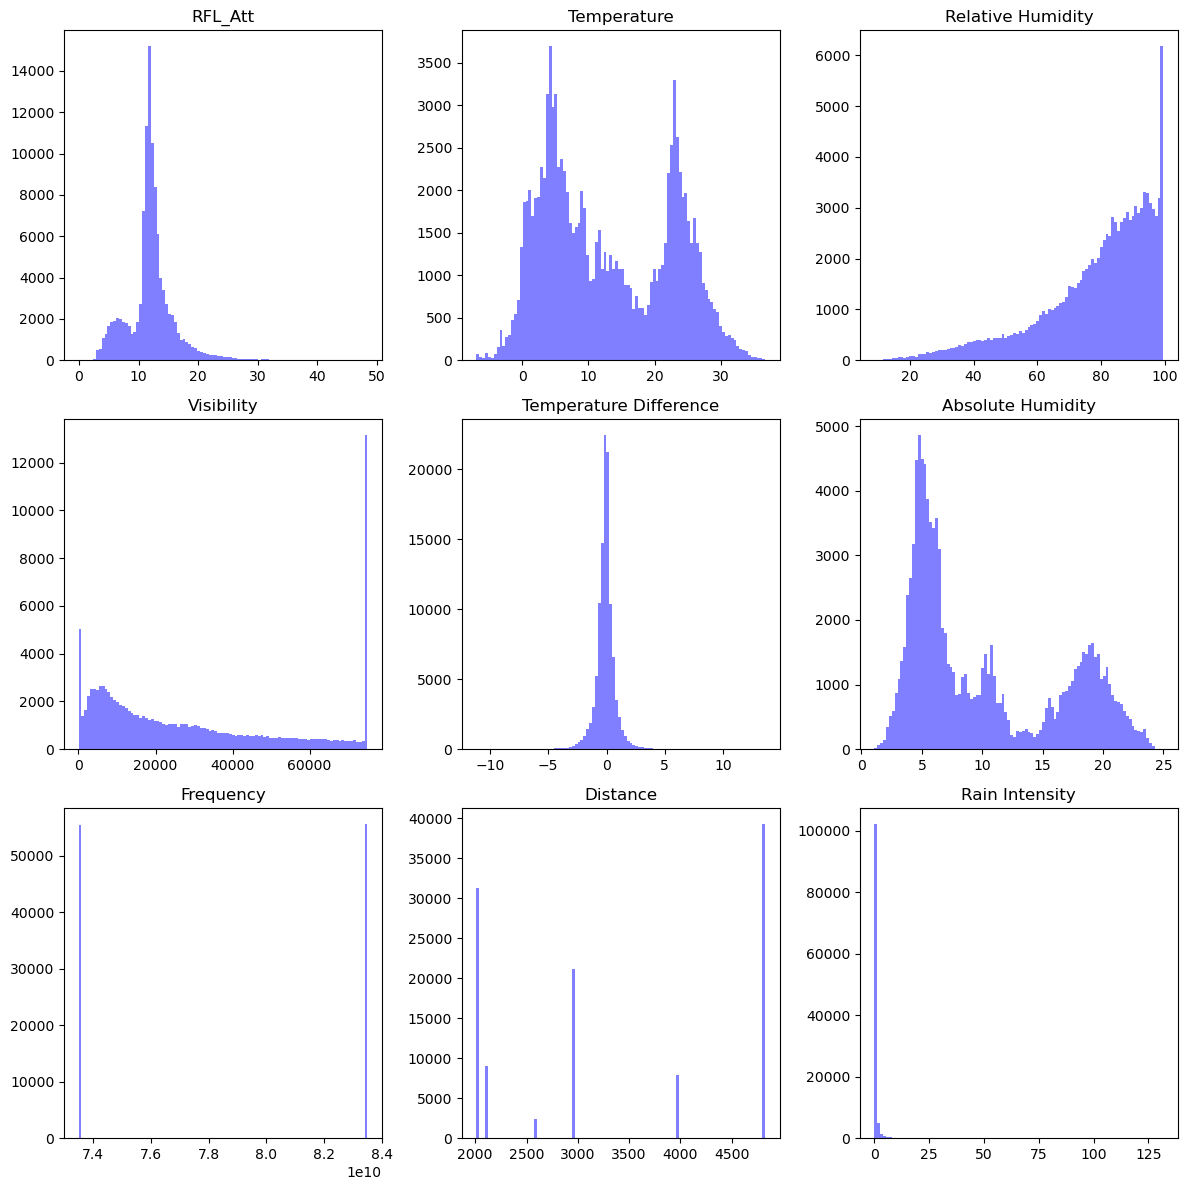

In [27]:
# for col in df.columns:
#     if ("SYNOP" not in col) and ("Time" not in col):
#         sns.histplot(x = df[col])
#         plt.show()

non_categorical_columns = [col for col in df.columns if ("SYNOP" not in col) and ("Time" not in col)]
df_non_categorical = df[non_categorical_columns]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.hist(df_non_categorical.iloc[:, i], bins=100, alpha=0.5, color='b')
    ax.set_title(df_non_categorical.columns[i])

fig.tight_layout()

plt.show()

In [28]:
df['Frequency'] = df['Frequency'] / 10000000000

Set up a baseline linear regression model

In [29]:

# Initialize the LinearRegression model
regressor = LinearRegression()

# Create the linear regression pipeline
# lr_pipe = Pipeline([("standard scaler", StandardScaler()), 
#                  ("regressor", regressor)])

lr_pipe = Pipeline([("regressor", regressor)])

train_set, test_set = train_test_split(df, test_size = 0.8, random_state = 42)

X_train = train_set.drop("RFL_Att", axis=1)
y_train = train_set["RFL_Att"]

X_test = test_set.drop("RFL_Att", axis=1)
y_test = test_set["RFL_Att"]


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(22208, 39) (22208,)
(88833, 39) (88833,)


In [30]:
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print(y_pred.shape)

# def pred_vs_actual(y_pred, y_test):
#     plt.figure(figsize=(10, 5))
#     plt.plot(np.linspace(1, 22208, num = 22208),y_pred, label="Predicted")
#     plt.plot(np.linspace(1, 22208, num = 22208),y_test, label="Actual")
#     plt.legend()
#     plt.show()
    
# def residual_plot(y_pred, y_test):
#     plt.scatter(y_pred, y_pred - y_test, c = "blue", marker = "s", label = "Training data")
#     plt.xlabel("Predicted values")
#     plt.ylabel("Residuals")
#     plt.show()
    
# def qq_plot(y_pred, y_test):
#     sm.qqplot(y_pred - y_test, line='45')
#     plt.show()

def print_equation(model, X_train = X_train):
    print("y = ", end="")
    for i in range(len(model.coef_)):
        if model.coef_[i] != 0:
            print(f"{model.coef_[i]:.2f} * {X_train.columns[i]} + ", end="")
    print(f"{model.intercept_:.2f}")
# pred_vs_actual(y_pred, y_test)
print("MSE train:", mean_squared_error(y_train, lr_pipe.predict(X_train)))
print("MSE test:", mean_squared_error(y_test, y_pred))
print("R2 train:", r2_score(y_train, lr_pipe.predict(X_train)))
print("R2 test:", r2_score(y_test, y_pred))
# residual_plot(y_pred, y_test)
# qq_plot(y_pred, y_test)
print_equation(lr_pipe["regressor"], X_train)

(88833,)
MSE train: 7.400873403258977
MSE test: 7.485010540365905
R2 train: 0.5577075736729615
R2 test: 0.5523236224256518
y = 0.13 * Temperature + 0.02 * Relative Humidity + -0.00 * Visibility + -0.23 * Temperature Difference + -0.42 * Absolute Humidity + 0.05 * Frequency + 0.00 * Distance + 0.55 * Rain Intensity + 13123037.98 * SYNOP_0 + 13123038.67 * SYNOP_3 + 13123038.09 * SYNOP_4 + 13123038.84 * SYNOP_5 + 13123040.95 * SYNOP_6 + 13123037.51 * SYNOP_7 + 13123040.07 * SYNOP_8 + 339008.36 * Time_0 + 339008.38 * Time_1 + 339008.47 * Time_2 + 339008.16 * Time_3 + 339008.38 * Time_4 + 339008.42 * Time_5 + 339008.62 * Time_6 + 339008.33 * Time_7 + 339008.12 * Time_8 + 339008.53 * Time_9 + 339008.18 * Time_10 + 339008.19 * Time_11 + 339007.92 * Time_12 + 339008.10 * Time_13 + 339007.99 * Time_14 + 339008.01 * Time_15 + 339007.91 * Time_16 + 339007.85 * Time_17 + 339007.61 * Time_18 + 339007.86 * Time_19 + 339007.79 * Time_20 + 339007.93 * Time_21 + 339007.85 * Time_22 + 339008.29 * Time_2

# Linear Regression with Interaction

Now we try to use the linear regression with interaction model

In [31]:
print(df.columns)

Index(['RFL_Att', 'Temperature', 'Relative Humidity', 'Visibility',
       'Temperature Difference', 'Absolute Humidity', 'Frequency', 'Distance',
       'Rain Intensity', 'SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6',
       'SYNOP_7', 'SYNOP_8', 'Time_0', 'Time_1', 'Time_2', 'Time_3', 'Time_4',
       'Time_5', 'Time_6', 'Time_7', 'Time_8', 'Time_9', 'Time_10', 'Time_11',
       'Time_12', 'Time_13', 'Time_14', 'Time_15', 'Time_16', 'Time_17',
       'Time_18', 'Time_19', 'Time_20', 'Time_21', 'Time_22', 'Time_23'],
      dtype='object')


In [32]:
df2 = df.copy()
categorical_columns = []
for col in df2.columns:
    if ("SYNOP" in col) or ("Time" in col):
        categorical_columns.append(col)
print(categorical_columns)

['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8', 'Time_0', 'Time_1', 'Time_2', 'Time_3', 'Time_4', 'Time_5', 'Time_6', 'Time_7', 'Time_8', 'Time_9', 'Time_10', 'Time_11', 'Time_12', 'Time_13', 'Time_14', 'Time_15', 'Time_16', 'Time_17', 'Time_18', 'Time_19', 'Time_20', 'Time_21', 'Time_22', 'Time_23']


In [33]:
feature_columns = df2.columns.drop(categorical_columns + ['RFL_Att'])

combinaisons = list(itertools.combinations(feature_columns, 2))

print(combinaisons)

[('Temperature', 'Relative Humidity'), ('Temperature', 'Visibility'), ('Temperature', 'Temperature Difference'), ('Temperature', 'Absolute Humidity'), ('Temperature', 'Frequency'), ('Temperature', 'Distance'), ('Temperature', 'Rain Intensity'), ('Relative Humidity', 'Visibility'), ('Relative Humidity', 'Temperature Difference'), ('Relative Humidity', 'Absolute Humidity'), ('Relative Humidity', 'Frequency'), ('Relative Humidity', 'Distance'), ('Relative Humidity', 'Rain Intensity'), ('Visibility', 'Temperature Difference'), ('Visibility', 'Absolute Humidity'), ('Visibility', 'Frequency'), ('Visibility', 'Distance'), ('Visibility', 'Rain Intensity'), ('Temperature Difference', 'Absolute Humidity'), ('Temperature Difference', 'Frequency'), ('Temperature Difference', 'Distance'), ('Temperature Difference', 'Rain Intensity'), ('Absolute Humidity', 'Frequency'), ('Absolute Humidity', 'Distance'), ('Absolute Humidity', 'Rain Intensity'), ('Frequency', 'Distance'), ('Frequency', 'Rain Intensit

In [34]:
for a, b in combinaisons:
    df2["{a} * {b}".format(a = a, b = b)] = df2[a] * df2[b]
    
for col in feature_columns:
    df2["{}^2".format(col)] = df2[col] ** 2

for col in feature_columns:
    for cat in categorical_columns:
        df2["{} * {}".format(col, cat)] = df2[col] * df2[cat]

/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_19289/969468362.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2["{} * {}".format(col, cat)] = df2[col] * df2[cat]
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_19289/969468362.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2["{} * {}".format(col, cat)] = df2[col] * df2[cat]
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_19289/969468362.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [35]:
df2.columns

Index(['RFL_Att', 'Temperature', 'Relative Humidity', 'Visibility',
       'Temperature Difference', 'Absolute Humidity', 'Frequency', 'Distance',
       'Rain Intensity', 'SYNOP_0',
       ...
       'Rain Intensity * Time_14', 'Rain Intensity * Time_15',
       'Rain Intensity * Time_16', 'Rain Intensity * Time_17',
       'Rain Intensity * Time_18', 'Rain Intensity * Time_19',
       'Rain Intensity * Time_20', 'Rain Intensity * Time_21',
       'Rain Intensity * Time_22', 'Rain Intensity * Time_23'],
      dtype='object', length=324)

In [36]:
train_set, test_set = train_test_split(df2, test_size = 0.4, random_state = 42)

X_train = train_set.drop("RFL_Att", axis=1)
y_train = train_set["RFL_Att"]

X_test = test_set.drop("RFL_Att", axis=1)
y_test = test_set["RFL_Att"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(66624, 323) (66624,)
(44417, 323) (44417,)


In [37]:
X_train.head()

,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,...,Rain Intensity * Time_14,Rain Intensity * Time_15,Rain Intensity * Time_16,Rain Intensity * Time_17,Rain Intensity * Time_18,Rain Intensity * Time_19,Rain Intensity * Time_20,Rain Intensity * Time_21,Rain Intensity * Time_22,Rain Intensity * Time_23
31424,11.501101,99.053511,6357.345497,-0.100,10.202052,8.35,2014.753055,0.97127,0,0,...,0.0,0.97127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5106,28.691852,71.722922,14212.883600,1.870,20.213559,8.35,2120.788402,0.00000,1,0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75845,4.985198,80.705217,44903.011180,-0.052,5.478243,7.35,4827.242455,0.00000,1,0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79679,1.022040,89.172037,12971.088840,-0.492,4.685340,7.35,4827.095210,0.00000,1,0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107639,9.553682,73.535252,22674.346800,-1.680,6.685448,8.35,4824.368449,0.00000,1,0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
regressor = LinearRegression()
lr_pipe = Pipeline([("regressor", regressor)])

Use backward selection to delete some features

In [39]:
# define backward selection
def backward_selection(X, y, threshold = 0.05):
    remain_features = list(X.columns)
    
    while True:
        X_current = sm.add_constant(X[remain_features])
        model = sm.OLS(y, X_current).fit()
        
        # calculate p-values
        pvalues = model.pvalues.drop("const")
        
        # find the feature with the largest p-value
        max_pvalue = pvalues.max()
        max_pvalue_feature = pvalues.idxmax()
        
        print("Current number of features:", len(remain_features))
        print("Largest p-value:", max_pvalue)
        print("Feature with largest p-value:", max_pvalue_feature)
        print("--------------------")
        
        # if the largest p-value is larger than the threshold, remove the feature
        if max_pvalue > threshold:
            remain_features.remove(max_pvalue_feature)
        else:
            break
    
    return remain_features

In [40]:
selected_features = backward_selection(X_train, y_train)

Current number of features: 323
Largest p-value: 0.9936726165801029
Feature with largest p-value: Relative Humidity * Time_12
--------------------
Current number of features: 322
Largest p-value: 0.9865348506659519
Feature with largest p-value: Time_21
--------------------
Current number of features: 321
Largest p-value: 0.9848185840522506
Feature with largest p-value: Temperature * Time_21
--------------------
Current number of features: 320
Largest p-value: 0.972074639524672
Feature with largest p-value: Time_22
--------------------
Current number of features: 319
Largest p-value: 0.957283276868266
Feature with largest p-value: Rain Intensity * SYNOP_4
--------------------
Current number of features: 318
Largest p-value: 0.9490943305385695
Feature with largest p-value: Relative Humidity * Temperature Difference
--------------------
Current number of features: 317
Largest p-value: 0.9589240517452104
Feature with largest p-value: Temperature Difference * Time_22
--------------------
Cu

In [41]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

def train_pipeline(pipeline, train_set = X_train, test_set = X_test):
    pipeline.fit(train_set, y_train)
    train_mse = mean_squared_error(y_train, pipeline.predict(train_set))
    test_mse = mean_squared_error(y_test, pipeline.predict(test_set))
    train_r2 = r2_score(y_train, pipeline.predict(train_set))
    test_r2 = r2_score(y_test, pipeline.predict(test_set))
    print("MSE train:", train_mse)
    print("MSE test:", test_mse)
    print("R2 train:", train_r2)
    print("R2 test:", test_r2)
    return {"pipeline" : pipeline, "train_mse" : train_mse, "test_mse" : test_mse, "train_r2" : train_r2, "test_r2" : test_r2, "predictos" : train_set.shape[1]}

# lr_interaction_pipe = Pipeline([("standard_scaler", StandardScaler()), 
#                              ("regressor", LinearRegression())])
lr_interaction_pipe = Pipeline([("regressor", LinearRegression())])
lr_interaction_pipe = train_pipeline(lr_interaction_pipe, train_set = X_train, test_set = X_test)["pipeline"]

MSE train: 3.6566287713933976
MSE test: 3.6831043337320226
R2 train: 0.781917281078635
R2 test: 0.7788605726049946


In [42]:
print_equation(lr_interaction_pipe["regressor"], X_train)

y = 1.21 * Temperature + 0.39 * Relative Humidity + 0.00 * Visibility + 0.13 * Temperature Difference + -2.60 * Absolute Humidity + 0.01 * Frequency + -0.01 * Distance + -2.47 * Rain Intensity + 4.27 * SYNOP_4 + -3.30 * SYNOP_6 + 3.17 * SYNOP_8 + 0.83 * Time_0 + -0.80 * Time_4 + 1.62 * Time_5 + 0.98 * Time_7 + 1.22 * Time_10 + 1.67 * Time_16 + 1.34 * Time_17 + 2.57 * Time_18 + 1.37 * Time_20 + 0.01 * Temperature * Relative Humidity + -0.00 * Temperature * Visibility + -0.02 * Temperature * Temperature Difference + -0.06 * Temperature * Absolute Humidity + -0.08 * Temperature * Frequency + -0.00 * Temperature * Distance + 0.11 * Temperature * Rain Intensity + -0.00 * Relative Humidity * Visibility + -0.01 * Relative Humidity * Absolute Humidity + -0.02 * Relative Humidity * Frequency + -0.00 * Relative Humidity * Distance + 0.05 * Relative Humidity * Rain Intensity + 0.00 * Visibility * Temperature Difference + 0.00 * Visibility * Absolute Humidity + -0.00 * Visibility * Distance + 0.03

Then we want to find the variance of each feature

In [43]:
coefficients = lr_interaction_pipe["regressor"].coef_
feature_variance = np.var(X_train, axis = 0)
variance_multiplied = coefficients**2 * feature_variance
variance_multiplied

Temperature                 133.429014
Relative Humidity            48.022672
Visibility                    0.993516
Temperature Difference        0.012592
Absolute Humidity           257.542017
                               ...    
Rain Intensity * Time_18      0.004512
Rain Intensity * Time_19      0.004749
Rain Intensity * Time_20      0.019477
Rain Intensity * Time_22      0.032352
Rain Intensity * Time_23      0.030853
Length: 215, dtype: float64

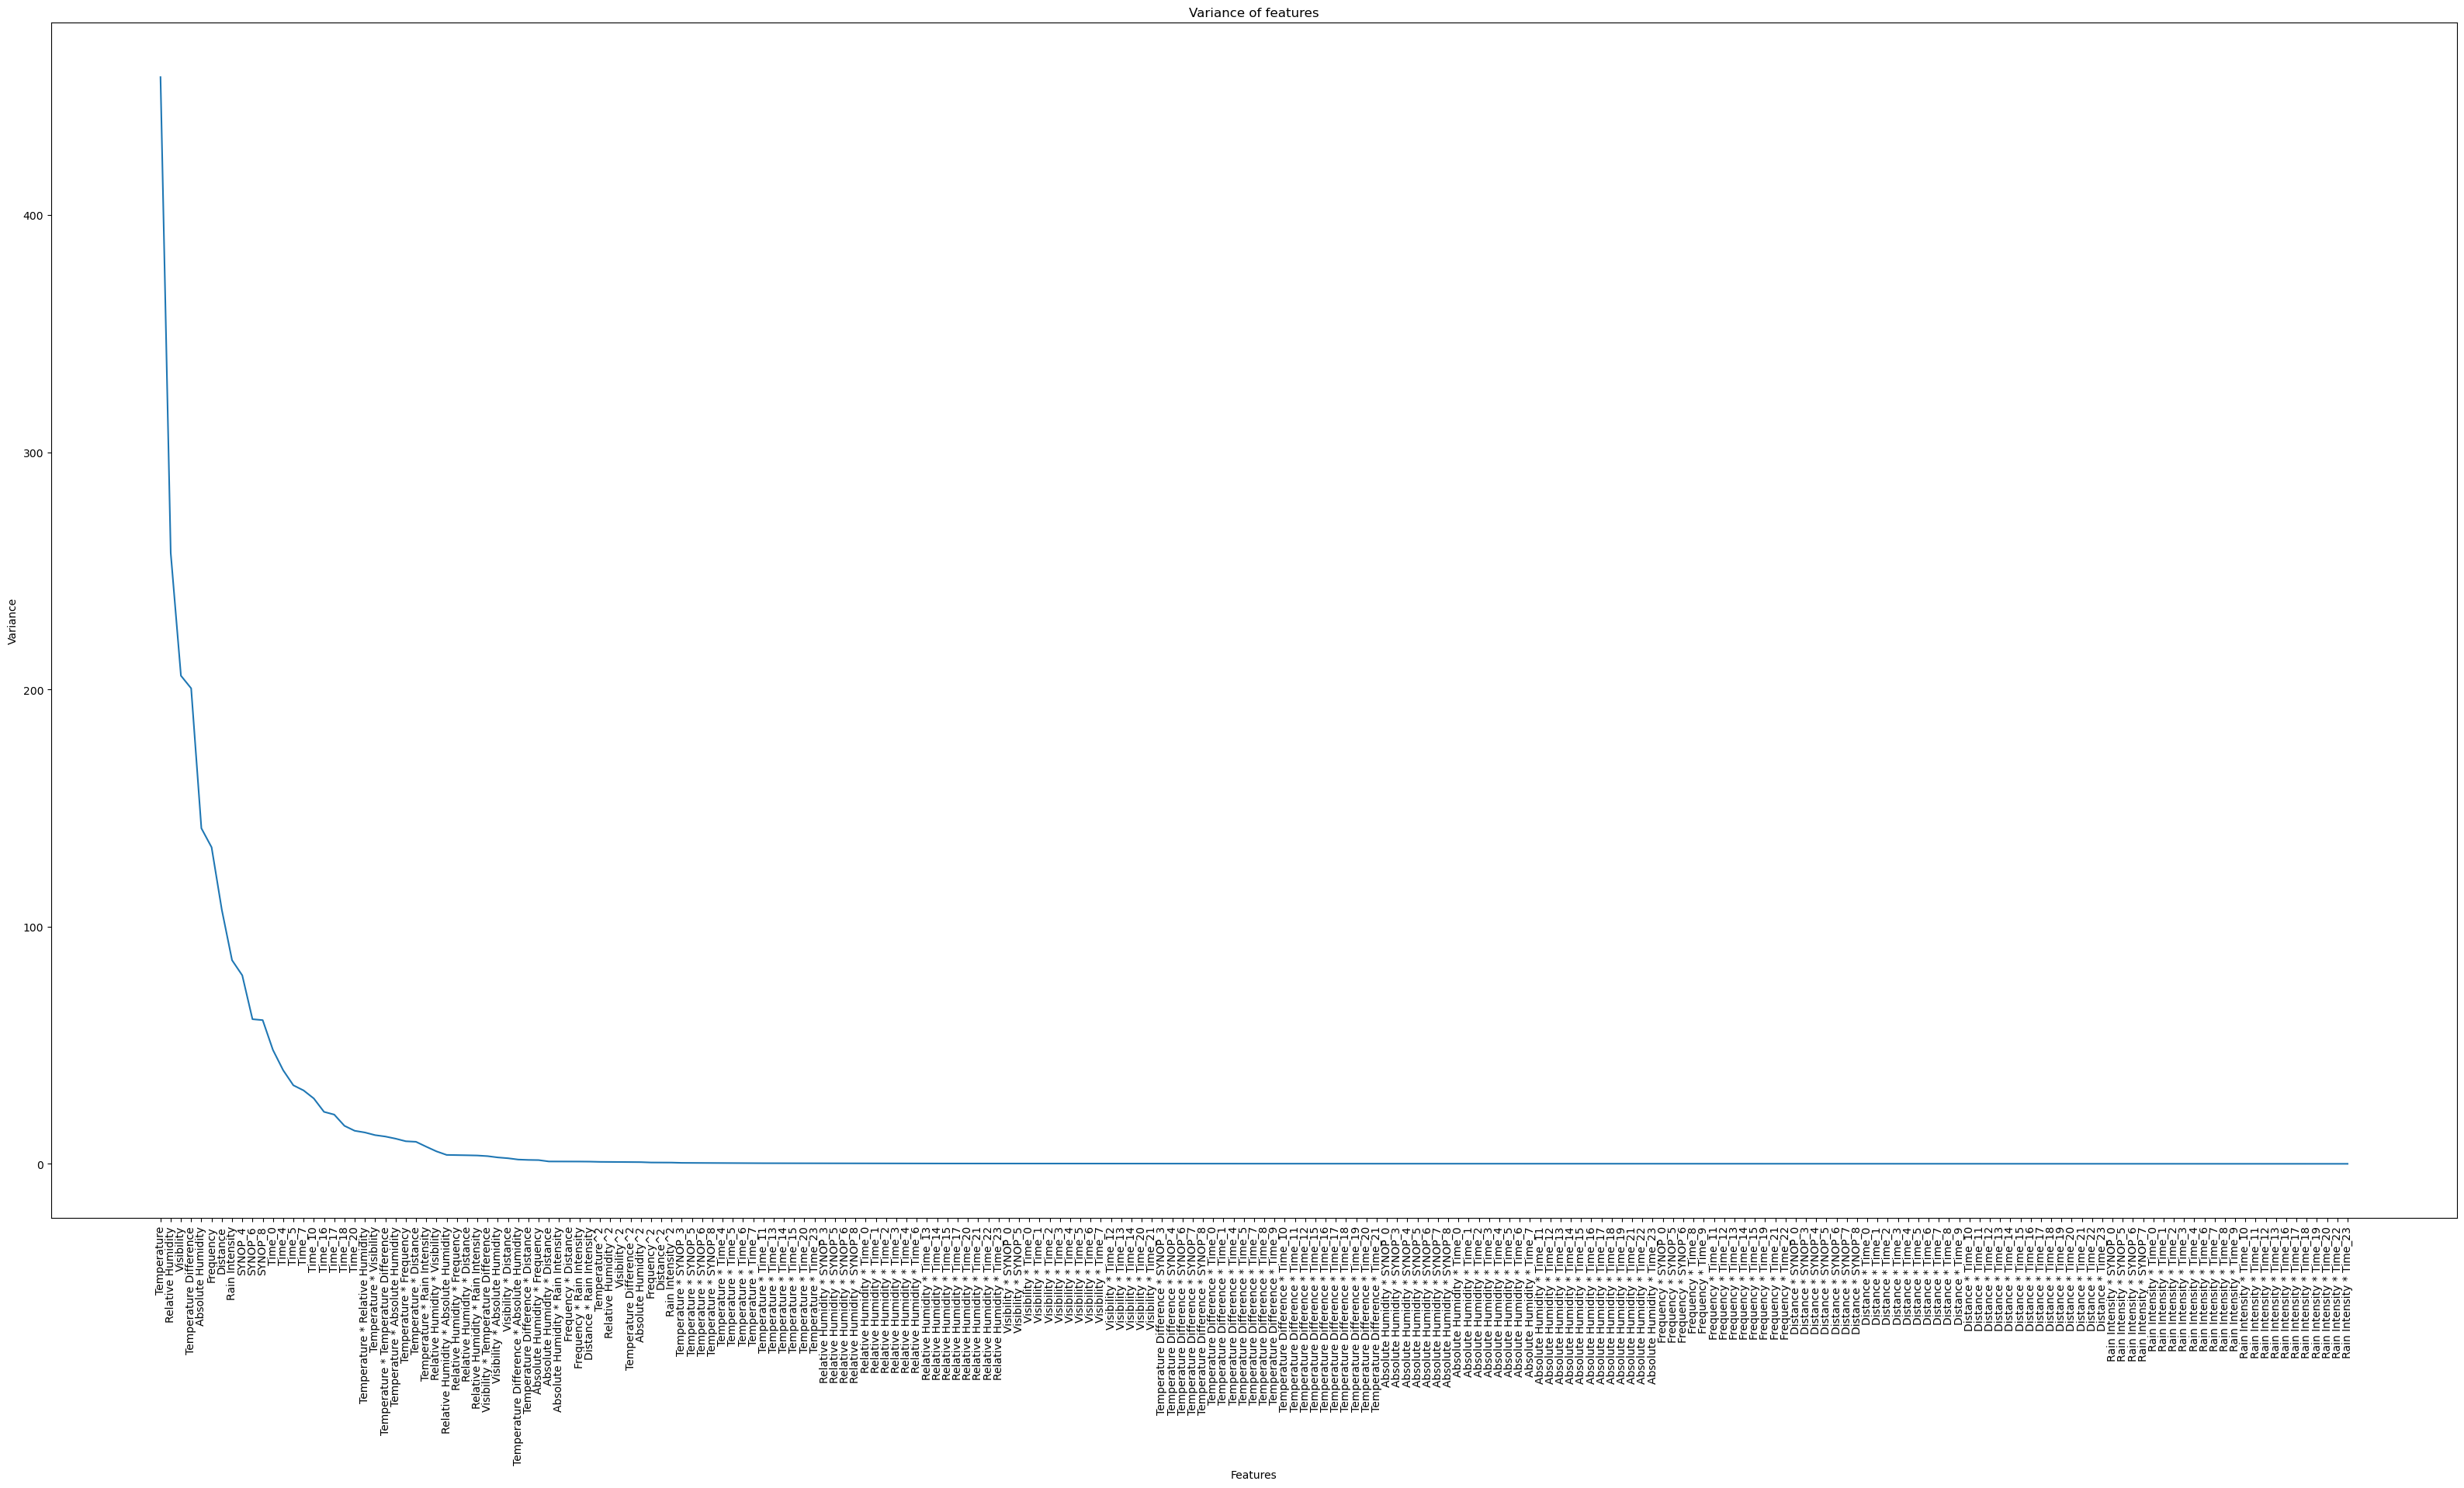

In [44]:
sorted_feature_variance = sorted(variance_multiplied, reverse = True)
plt.figure(figsize=(40, 20))
plt.plot(sorted_feature_variance)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.xticks(range(len(sorted_feature_variance)), X_train.columns, rotation = 90)
# plt.yticks(sorted_feature_variance)
plt.title("Variance of features")
plt.savefig("./", dpi = 600, bbox_inches = "tight")
plt.show()

In [45]:
def feature_select_thresold(threshold):
    important_features = variance_multiplied > threshold
    important_features_indices = np.where(important_features)[0]
    print("-------------------------------------------------------------------------")
    print("Current threshold:", threshold)
    print("Current Number of features:", len(important_features_indices))
    # print("---------------------", "Trying Model with", len(important_features_indices), "features", "--------------------")
    # print(important_features_indices)
    train_set = X_train.iloc[:, important_features_indices]
    test_set = X_test.iloc[:, important_features_indices]
    
    # lr_interaction_pipe = Pipeline([("standard_scaler", StandardScaler()), 
    #                          ("regressor", LinearRegression())])
    
    lr_interaction_pipe = Pipeline([("regressor", LinearRegression())])
    
    lr_interaction_pipe.fit(train_set, y_train)
    train_mse = mean_squared_error(y_train, lr_interaction_pipe.predict(train_set))
    test_mse = mean_squared_error(y_test, lr_interaction_pipe.predict(test_set))
    train_r2 = r2_score(y_train, lr_interaction_pipe.predict(train_set))
    test_r2 = r2_score(y_test, lr_interaction_pipe.predict(test_set))

    return {"pipeline" : lr_interaction_pipe, "train_mse" : train_mse, "test_mse" : test_mse, "train_r2" : train_r2, "test_r2" : test_r2, "predictors" : len(important_features_indices)}

In [46]:
thresholds = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 20, 30, 40, 50]
train_mses = []
test_mses = []
train_r2s = []
test_r2s = []
n_features = []
for threshold in thresholds:
    result = feature_select_thresold(threshold)
    n_feature = result["predictors"]
    train_mse = result["train_mse"]
    test_mse = result["test_mse"]
    train_r2 = result["train_r2"]
    test_r2 = result["test_r2"]
    
    n_features.append(n_feature)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

-------------------------------------------------------------------------
Current threshold: 0.0001
Current Number of features: 214
-------------------------------------------------------------------------
Current threshold: 0.0005
Current Number of features: 209
-------------------------------------------------------------------------
Current threshold: 0.001
Current Number of features: 202
-------------------------------------------------------------------------
Current threshold: 0.005
Current Number of features: 180
-------------------------------------------------------------------------
Current threshold: 0.01
Current Number of features: 164
-------------------------------------------------------------------------
Current threshold: 0.05
Current Number of features: 121
-------------------------------------------------------------------------
Current threshold: 0.1
Current Number of features: 95
-------------------------------------------------------------------------
Current thre

In [47]:
def visulize_thresold_result(thresholds, train_result, test_result, metric):
    fig, ax = plt.subplots(figsize = (20, 8))

    ax.plot(np.arange(len(thresholds)), train_result, label = f"train_{metric}", marker = 'o')
    ax.plot(np.arange(len(thresholds)), test_result, label = f"test_{metric}", marker = 'o')
    
    xticks = np.linspace(0, len(thresholds) - 1, len(thresholds))
    ax.set_xlabel("Threshold")
    ax.set_ylabel(metric)
    ax.set_xticks(xticks)
    ax.set_xticklabels(thresholds)
    ax.set_title(f"{metric} vs Threshold")

    ax.legend()
    plt.show()

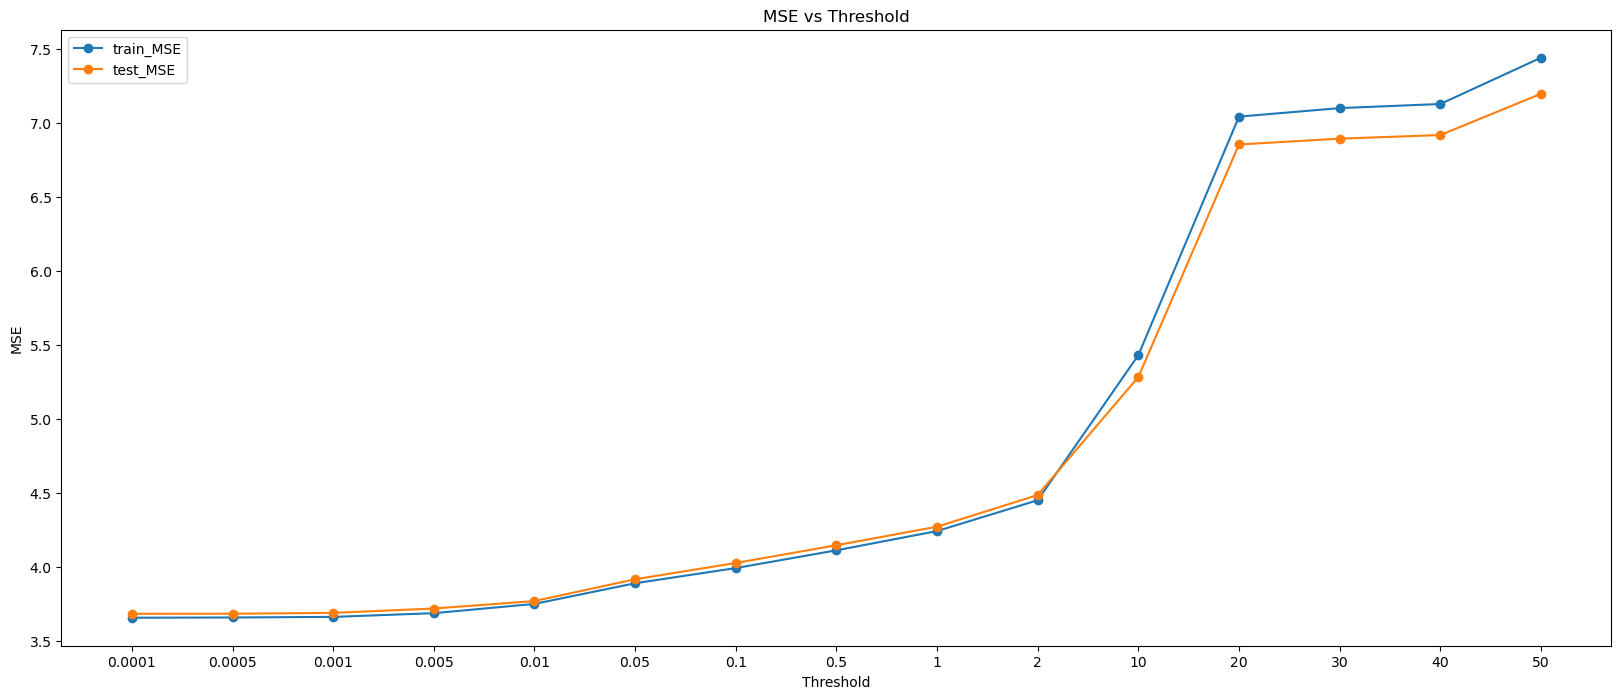

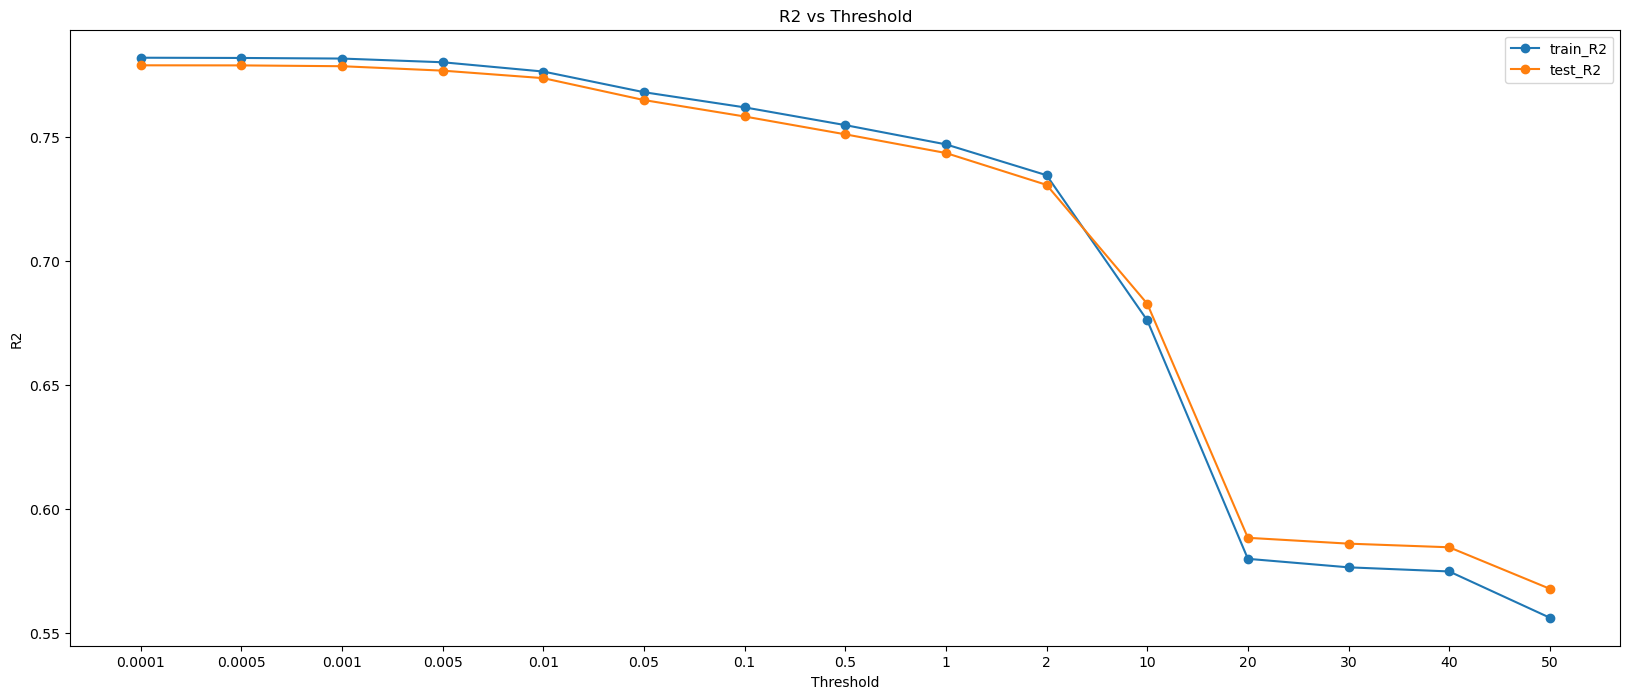

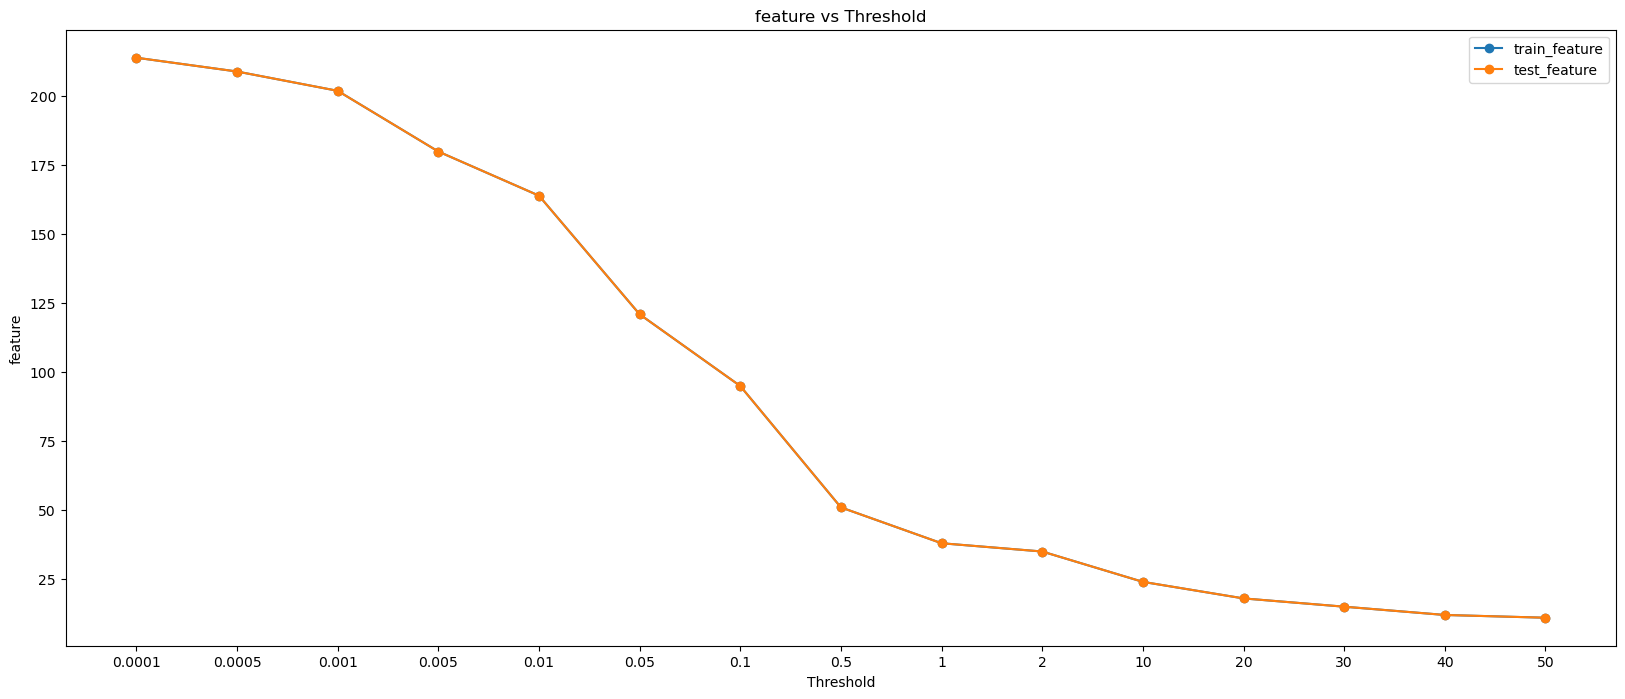

In [48]:
visulize_thresold_result(thresholds, train_mses, test_mses, "MSE")
visulize_thresold_result(thresholds, train_r2s, test_r2s, "R2")

visulize_thresold_result(thresholds, n_features, n_features, "feature")

In [49]:
# thresholds = np.arange(0.1, 0.5, 0.1)
# print(thresholds)
# train_mses = []
# test_mses = []
# train_r2s = []
# test_r2s = []
# n_features = []
# for threshold in thresholds:
#     result = feature_select_thresold(threshold)
#     n_feature = result["predictors"]
#     train_mse = result["train_mse"]
#     test_mse = result["test_mse"]
#     train_r2 = result["train_r2"]
#     test_r2 = result["test_r2"]
    
#     n_features.append(n_feature)
#     train_mses.append(train_mse)
#     test_mses.append(test_mse)
#     train_r2s.append(train_r2)
#     test_r2s.append(test_r2)

# # print(train_mses)
# # print(test_mses)
# # print(train_r2s)
# # print(test_r2s)

In [50]:
# visulize_thresold_result(thresholds, train_mses, test_mses, "MSE")
# visulize_thresold_result(thresholds, train_r2s, test_r2s, "R2")

In [51]:
result = feature_select_thresold(1)
print(result["train_mse"])
print(result["test_mse"])
print(result['train_r2'])
print(result['test_r2'])

-------------------------------------------------------------------------
Current threshold: 1
Current Number of features: 38
4.242099127523531
4.271800068681658
0.746999608245233
0.7435143467203938


In [52]:
print_equation(result['pipeline']['regressor'], X_train)

y = 0.20 * Temperature + 0.15 * Relative Humidity + -1.81 * Visibility + -0.02 * Temperature Difference + -2.26 * Absolute Humidity + -7.30 * Frequency + 0.01 * Distance + -0.00 * Rain Intensity + -0.03 * SYNOP_4 + 0.05 * SYNOP_6 + -0.00 * SYNOP_8 + 0.11 * Time_0 + -0.00 * Time_4 + -0.01 * Time_5 + 0.01 * Time_7 + -0.00 * Time_10 + 0.03 * Time_16 + 0.00 * Time_17 + -0.09 * Time_18 + 0.00 * Time_20 + -0.16 * Temperature * Relative Humidity + -0.00 * Temperature * Visibility + 0.00 * Temperature * Temperature Difference + 0.02 * Temperature * Absolute Humidity + 0.00 * Temperature * Frequency + 0.04 * Temperature * Distance + 0.00 * Temperature * Rain Intensity + -0.01 * Relative Humidity * Visibility + 0.24 * Relative Humidity * Absolute Humidity + 0.10 * Relative Humidity * Frequency + -0.11 * Relative Humidity * Distance + -0.09 * Relative Humidity * Rain Intensity + -0.44 * Visibility * Temperature Difference + 0.02 * Visibility * Absolute Humidity + -0.00 * Visibility * Distance + 0